In [1]:
# importing the dependencies
import numpy as np
import math
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import keras 
from keras import backend as k
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential ,Model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense,Dropout
from keras.callbacks import ModelCheckpoint
from IPython.display import clear_output

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# reading the training data 
train_data = pd.read_csv('training.csv')

In [3]:
# columns in the training dataset
print(train_data.columns)

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')


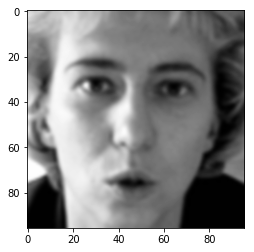

In [248]:
# showing the images in the datset 
image_no = 1
img = train_data['Image'][image_no]
img = img.split(' ')
img = np.asarray(img)
# reshaping the image to appropriate size
img = np.reshape(img, (96,96))
# changing the datatype as float
img = img.astype(np.float32)
# plotting the image
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')

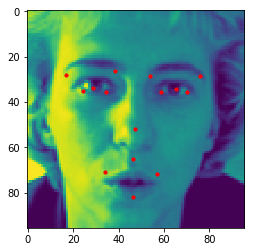

In [249]:
# image with facial data points
implot = plt.imshow(img)
output = information(10)

i =0
x=[]
y = []
while i<15:
    x.append(output[i]*96)
    i = i +1
while i<30:
    y.append(output[i]*96)
    i = i +1
implot = plt.imshow(img)
plt.scatter(x=x,           
            y=y, c='red', s=10)
plt.show()


In [16]:
# please note that some of the images in the dataset have missing label for some of the key points

In [17]:
# name of the columns and their missing no of values
null_columns=train_data.columns[train_data.isnull().any()]
train_data[null_columns].isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_bottom_lip_y      33
dtype: int64

In [18]:
# rows which have atleast one missing values 
nans = lambda df: df[df.isnull().any(axis=1)]
info = nans(train_data)
print(info)

# here we see that 4,909 rows have missing values we will remove these rows from our dataset 
# so that we need not to deal with mising values



      left_eye_center_x  left_eye_center_y  right_eye_center_x  \
210           65.365120          39.988480           28.251520   
350           67.258311          37.229867           26.980267   
499           65.783008          41.160992           29.971041   
512           68.286689          38.490807           31.361311   
810           72.376354          37.281897           24.536920   
839           71.608653          37.331265           23.567020   
895           67.778824          38.537224           30.175059   
1058          67.436522          40.618435           29.197217   
1194          65.891064          43.829106           25.692255   
1230          68.266667          51.213511           26.464000   
1245          70.700184          40.170176           30.152837   
1546          67.997250          38.698125           27.411750   
1548          78.393899          47.554366           32.857401   
1585          65.147631          31.377315           28.062260   
1588      

In [19]:
# to find the index of the missing image 
missing_values = info.index
print(missing_values[0])

210


In [20]:
# returns the x co-ordinate and y coordinate of the 15 landmark points on the face
def information(image_no):
    left_eye_center_x = train_data['left_eye_center_x'][image_no]/96
    left_eye_center_y = train_data['left_eye_center_y'][image_no]/96

    right_eye_center_x = train_data['right_eye_center_x'][image_no]/96
    right_eye_center_y = train_data['right_eye_center_y'][image_no]/96

    left_eye_inner_corner_x = train_data['left_eye_inner_corner_x'][image_no]/96
    left_eye_inner_corner_y = train_data['left_eye_inner_corner_y'][image_no]/96

    left_eye_outer_corner_x = train_data['left_eye_outer_corner_x'][image_no]/96
    left_eye_outer_corner_y = train_data['left_eye_outer_corner_y'][image_no]/96

    right_eye_inner_corner_x = train_data['right_eye_inner_corner_x'][image_no]/96
    right_eye_inner_corner_y = train_data['right_eye_inner_corner_y'][image_no]/96

    right_eye_outer_corner_x = train_data['right_eye_outer_corner_x'][image_no]/96
    right_eye_outer_corner_y = train_data['right_eye_outer_corner_y'][image_no]/96

    left_eyebrow_inner_end_x = train_data['left_eyebrow_inner_end_x'][image_no]/96
    left_eyebrow_inner_end_y = train_data['left_eyebrow_inner_end_y'][image_no]/96

    left_eyebrow_outer_end_x = train_data['left_eyebrow_outer_end_x'][image_no]/96
    left_eyebrow_outer_end_y = train_data['left_eyebrow_outer_end_y'][image_no]/96

    right_eyebrow_inner_end_x = train_data['right_eyebrow_inner_end_x'][image_no]/96
    right_eyebrow_inner_end_y = train_data['right_eyebrow_inner_end_y'][image_no]/96

    right_eyebrow_outer_end_x = train_data['right_eyebrow_outer_end_x'][image_no]/96
    right_eyebrow_outer_end_y = train_data['right_eyebrow_outer_end_y'][image_no]/96

    nose_tip_x = train_data['nose_tip_x'][image_no]/96
    nose_tip_y = train_data['nose_tip_y'][image_no]/96

    mouth_left_corner_x = train_data['mouth_left_corner_x'][image_no]/96
    mouth_left_corner_y = train_data['mouth_left_corner_y'][image_no]/96

    mouth_right_corner_x = train_data['mouth_right_corner_x'][image_no]/96
    mouth_right_corner_y = train_data['mouth_right_corner_y'][image_no]/96

    mouth_center_top_lip_x = train_data['mouth_center_top_lip_x'][image_no]/96
    mouth_center_top_lip_y = train_data['mouth_center_top_lip_y'][image_no]/96

    mouth_center_bottom_lip_x = train_data['mouth_center_bottom_lip_x'][image_no]/96
    mouth_center_bottom_lip_y = train_data['mouth_center_bottom_lip_y'][image_no]/96
    
    y = [left_eye_center_x,right_eye_center_x,left_eye_inner_corner_x,
              left_eye_outer_corner_x,right_eye_inner_corner_x,
              right_eye_outer_corner_x,left_eyebrow_inner_end_x,left_eyebrow_outer_end_x,
              right_eyebrow_inner_end_x,right_eyebrow_outer_end_x,nose_tip_x,
              mouth_left_corner_x,mouth_right_corner_x,mouth_center_top_lip_x,mouth_center_bottom_lip_x,
              left_eye_center_y,right_eye_center_y,left_eye_inner_corner_y,
              left_eye_outer_corner_y,left_eye_outer_corner_y,right_eye_inner_corner_y,left_eyebrow_inner_end_y,
              left_eyebrow_outer_end_y,
              right_eyebrow_inner_end_y,right_eyebrow_outer_end_y,nose_tip_y,
              mouth_left_corner_y,mouth_right_corner_y,mouth_center_top_lip_y,mouth_center_bottom_lip_y]
    return y

In [44]:
# this function flips the images vertically or horizontly depending upon the flip bit sent
# this also changes the co- ordinates of the landmark point to fit the new transformed image 

def flip(image_no, flip):
    
    img = train_data['Image'][image_no]
    img = img.split(' ')
    img = np.asarray(img)
    
    # reshaping the image to appropriate size
    img = np.reshape(img, (96,96))
    flipped_image = img
    # getting the co-ordinates
    output = information(image_no)
    # adjusting the co-ordinates to match the flipped image
    if flip == 0:
        i = 15
        while i<30:
            output[i] = 1-output[i]
            i = i + 1
    elif flip ==1:
        i =0
        while i<15:
            output[i] = 1 - output[i]
            i = i +1
    
    # changing the datatype as float
    img = img.astype(np.float32)
    # flips the image vertically
    if flip == 0:
        flipped_image = np.flip(img, 0)
    # flips the image horizontly
    elif flip == 1:
        flipped_image = np.flip(img ,1)
    return flipped_image,output

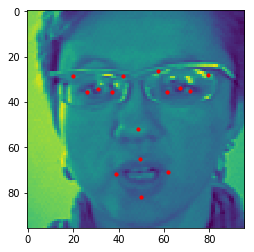

In [176]:
# checking the flip function

# verical flip
img,output = flip(10,1)
img = img.astype(np.float32)

implot = plt.imshow(img)

i =0
x=[]
y = []
while i<15:
    x.append(output[i]*96)
    i = i +1
while i<30:
    y.append(output[i]*96)
    i = i +1
implot = plt.imshow(img)
plt.scatter(x=x,           
            y=y, c='red', s=10)
plt.show()

In [47]:
i=0
X = []
y = []
k = 0
while i<7049:
    val = []
    if i == missing_values[k]:
        i = i +1
        k = k +1
        continue
    img = train_data['Image'][i]
    img = img.split(' ')
    img = np.asarray(img)
    # reshaping the image to appropriate size
    img = np.reshape(img, (96,96))
    # changing the datatype as float
    img = img.astype(np.float32)
    X.append(img)
    
    get_info = information(i)
    y.append(get_info)
    
    if i%1000 == 0:
        print(i)
    i = i + 1

0
1000
2000


In [48]:
X = np.asarray(X)
X = np.reshape(X, (2140,96,96,1))
X = X /255
print(X.shape)
y=np.asarray(y)
print(y.shape)

(2140, 96, 96, 1)
(2140, 30)


# TRAINING WITH DATA AUGMENTATION

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1712, 96, 96, 1)
(428, 96, 96, 1)
(1712, 30)
(428, 30)


In [51]:
# we will generate additional 1712 augmented images and add it to training set
i = 0
X_vertical = []
y_vertical = []

while i<7049:
    k = 0
    flag = 0
    while k<30:
        if math.isnan(information(i)[k]):
            flag = 1
            break
        k = k +1
    if flag ==0:
        flipped_image,output = flip(i,0)
        X_vertical.append(flipped_image)
        y_vertical.append(output)
    if i%500 == 0:
        print(i)
    i = i +1

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000


In [52]:
X_vertical = np.asarray(X_vertical)
y_vertical = np.asarray(y_vertical)
print(X_vertical.shape)
print(y_vertical.shape)

(2140, 96, 96)
(2140, 30)


In [53]:
# we will generate additional 1712 augmented images and add it to training set
i = 0
X_horizontal = []
y_horizontal =   []

while i<7049:
    k = 0
    flag = 0
    while k<30:
        if math.isnan(information(i)[k]):
            flag = 1
            break
        k = k +1
    if flag ==0:
        flipped_image,output = flip(i,0)
        X_horizontal.append(flipped_image)
        y_horizontal.append(output)
    if i%500 == 0:
        print(i)
    i = i +1

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000


In [54]:
X_horizontal = np.asarray(X_horizontal)
y_horizontal = np.asarray(y_horizontal)
print(X_horizontal.shape)
print(y_horizontal.shape)

(2140, 96, 96)
(2140, 30)


In [58]:
X_vertical = np.reshape(X_vertical, (2140,96,96,1))/255
X_horizontal = np.reshape(X_horizontal, (2140,96,96,1))/255

In [60]:
X_train = np.vstack([X_train,X_vertical,X_horizontal])
y_train = np.vstack([y_train,y_vertical,y_horizontal])

print(X_train.shape)
print(y_train.shape)

(5992, 96, 96, 1)
(5992, 30)


In [61]:
checkpoint = ModelCheckpoint('best_model_augmented.h5', monitor='val_loss',verbose=1, save_best_only=True)
history = keras.callbacks.History()


# model architecture
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(30))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [181]:
# training the model
history = model.fit(X_train,y_train,
                    validation_data = [X_test,y_test],
                    epochs = 150, callbacks=[checkpoint, history],
                    shuffle=True,batch_size = 500)

Train on 5992 samples, validate on 428 samples
Epoch 1/150
5992/5992 [==============================] - 59s 10ms/step - loss: 8.0105e-04 - mean_absolute_error: 0.0217 - val_loss: 4.1515e-04 - val_mean_absolute_error: 0.0137

Epoch 00001: val_loss did not improve from 0.00039
Epoch 2/150
5992/5992 [==============================] - 60s 10ms/step - loss: 8.0253e-04 - mean_absolute_error: 0.0217 - val_loss: 4.2340e-04 - val_mean_absolute_error: 0.0139

Epoch 00002: val_loss did not improve from 0.00039
Epoch 3/150
5992/5992 [==============================] - 57s 9ms/step - loss: 7.9248e-04 - mean_absolute_error: 0.0216 - val_loss: 3.9976e-04 - val_mean_absolute_error: 0.0134

Epoch 00003: val_loss did not improve from 0.00039
Epoch 4/150
5992/5992 [==============================] - 57s 9ms/step - loss: 7.7273e-04 - mean_absolute_error: 0.0214 - val_loss: 4.0599e-04 - val_mean_absolute_error: 0.0134

Epoch 00004: val_loss did not improve from 0.00039
Epoch 5/150
5992/5992 [================

5992/5992 [==============================] - 57s 10ms/step - loss: 7.0205e-04 - mean_absolute_error: 0.0202 - val_loss: 3.8700e-04 - val_mean_absolute_error: 0.0130

Epoch 00036: val_loss did not improve from 0.00037
Epoch 37/150
5992/5992 [==============================] - 58s 10ms/step - loss: 6.7866e-04 - mean_absolute_error: 0.0200 - val_loss: 3.9786e-04 - val_mean_absolute_error: 0.0132

Epoch 00037: val_loss did not improve from 0.00037
Epoch 38/150
5992/5992 [==============================] - 57s 10ms/step - loss: 6.7131e-04 - mean_absolute_error: 0.0198 - val_loss: 3.9161e-04 - val_mean_absolute_error: 0.0131

Epoch 00038: val_loss did not improve from 0.00037
Epoch 39/150
5992/5992 [==============================] - 57s 10ms/step - loss: 6.6429e-04 - mean_absolute_error: 0.0197 - val_loss: 3.8443e-04 - val_mean_absolute_error: 0.0131

Epoch 00039: val_loss did not improve from 0.00037
Epoch 40/150
5992/5992 [==============================] - 58s 10ms/step - loss: 6.7942e-04 - 


Epoch 00071: val_loss did not improve from 0.00037
Epoch 72/150
5992/5992 [==============================] - 57s 9ms/step - loss: 5.8107e-04 - mean_absolute_error: 0.0184 - val_loss: 3.8654e-04 - val_mean_absolute_error: 0.0131

Epoch 00072: val_loss did not improve from 0.00037
Epoch 73/150
5992/5992 [==============================] - 57s 10ms/step - loss: 5.7937e-04 - mean_absolute_error: 0.0183 - val_loss: 3.9922e-04 - val_mean_absolute_error: 0.0129

Epoch 00073: val_loss did not improve from 0.00037
Epoch 74/150
5992/5992 [==============================] - 56s 9ms/step - loss: 5.7100e-04 - mean_absolute_error: 0.0182 - val_loss: 3.8447e-04 - val_mean_absolute_error: 0.0127

Epoch 00074: val_loss did not improve from 0.00037
Epoch 75/150
5992/5992 [==============================] - 57s 9ms/step - loss: 5.7106e-04 - mean_absolute_error: 0.0182 - val_loss: 3.7742e-04 - val_mean_absolute_error: 0.0128

Epoch 00075: val_loss did not improve from 0.00037
Epoch 76/150
5992/5992 [=======

5992/5992 [==============================] - 57s 9ms/step - loss: 5.0674e-04 - mean_absolute_error: 0.0171 - val_loss: 4.1314e-04 - val_mean_absolute_error: 0.0131

Epoch 00107: val_loss did not improve from 0.00036
Epoch 108/150
5992/5992 [==============================] - 57s 9ms/step - loss: 5.1177e-04 - mean_absolute_error: 0.0172 - val_loss: 3.7123e-04 - val_mean_absolute_error: 0.0125

Epoch 00108: val_loss did not improve from 0.00036
Epoch 109/150
5992/5992 [==============================] - 57s 9ms/step - loss: 5.1332e-04 - mean_absolute_error: 0.0172 - val_loss: 3.7092e-04 - val_mean_absolute_error: 0.0125

Epoch 00109: val_loss did not improve from 0.00036
Epoch 110/150
5992/5992 [==============================] - 56s 9ms/step - loss: 5.0054e-04 - mean_absolute_error: 0.0170 - val_loss: 3.8681e-04 - val_mean_absolute_error: 0.0126

Epoch 00110: val_loss did not improve from 0.00036
Epoch 111/150
5992/5992 [==============================] - 56s 9ms/step - loss: 5.1054e-04 - m

5992/5992 [==============================] - 57s 10ms/step - loss: 4.5192e-04 - mean_absolute_error: 0.0161 - val_loss: 3.6258e-04 - val_mean_absolute_error: 0.0124

Epoch 00142: val_loss did not improve from 0.00034
Epoch 143/150
5992/5992 [==============================] - 57s 9ms/step - loss: 4.5991e-04 - mean_absolute_error: 0.0162 - val_loss: 3.6167e-04 - val_mean_absolute_error: 0.0124

Epoch 00143: val_loss did not improve from 0.00034
Epoch 144/150
5992/5992 [==============================] - 56s 9ms/step - loss: 4.4259e-04 - mean_absolute_error: 0.0159 - val_loss: 3.6534e-04 - val_mean_absolute_error: 0.0123

Epoch 00144: val_loss did not improve from 0.00034
Epoch 145/150
5992/5992 [==============================] - 55s 9ms/step - loss: 4.4922e-04 - mean_absolute_error: 0.0160 - val_loss: 3.5855e-04 - val_mean_absolute_error: 0.0124

Epoch 00145: val_loss did not improve from 0.00034
Epoch 146/150
5992/5992 [==============================] - 55s 9ms/step - loss: 4.5316e-04 - 

# TRAINING WITHOUT HISTOGRAM EQUALIZATION 

In [352]:

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss',verbose=1, save_best_only=True)
history = keras.callbacks.History()


# model architecture
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(30))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 94, 94, 16)        160       
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 8, 8, 128)         73856     
__________

In [179]:
#plot the loss curves
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [192]:
# splitting the data into training and cross validation to evaluate the performance of the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1712, 96, 96, 1)
(428, 96, 96, 1)
(1712, 30)
(428, 30)


In [288]:
# loading the saved model from the disk
from keras.models import load_model
model = load_model('model/best_model.h5')

In [372]:
# training the model
history = model.fit(X_train,y_train,
                    validation_data = [X_test,y_test],
                    epochs = 300, callbacks=[checkpoint, history],
                    shuffle=True,batch_size = 500)

Train on 1712 samples, validate on 428 samples
Epoch 1/300
1712/1712 [==============================] - 18s 11ms/step - loss: 8.9934e-04 - mean_absolute_error: 0.0229 - val_loss: 3.1982e-04 - val_mean_absolute_error: 0.0124

Epoch 00001: val_loss did not improve from 0.00032
Epoch 2/300
1712/1712 [==============================] - 18s 10ms/step - loss: 8.9824e-04 - mean_absolute_error: 0.0231 - val_loss: 3.1557e-04 - val_mean_absolute_error: 0.0124

Epoch 00002: val_loss improved from 0.00032 to 0.00032, saving model to best_model.h5
Epoch 3/300
1712/1712 [==============================] - 18s 11ms/step - loss: 9.2459e-04 - mean_absolute_error: 0.0234 - val_loss: 3.2504e-04 - val_mean_absolute_error: 0.0126

Epoch 00003: val_loss did not improve from 0.00032
Epoch 4/300
1712/1712 [==============================] - 18s 10ms/step - loss: 8.9278e-04 - mean_absolute_error: 0.0229 - val_loss: 3.2150e-04 - val_mean_absolute_error: 0.0124

Epoch 00004: val_loss did not improve from 0.00032
Ep


Epoch 00035: val_loss improved from 0.00031 to 0.00030, saving model to best_model.h5
Epoch 36/300
1712/1712 [==============================] - 17s 10ms/step - loss: 8.6571e-04 - mean_absolute_error: 0.0224 - val_loss: 3.1952e-04 - val_mean_absolute_error: 0.0124

Epoch 00036: val_loss did not improve from 0.00030
Epoch 37/300
1712/1712 [==============================] - 17s 10ms/step - loss: 8.4286e-04 - mean_absolute_error: 0.0221 - val_loss: 3.0754e-04 - val_mean_absolute_error: 0.0121

Epoch 00037: val_loss did not improve from 0.00030
Epoch 38/300
1712/1712 [==============================] - 17s 10ms/step - loss: 8.0692e-04 - mean_absolute_error: 0.0218 - val_loss: 3.1147e-04 - val_mean_absolute_error: 0.0122

Epoch 00038: val_loss did not improve from 0.00030
Epoch 39/300
1712/1712 [==============================] - 17s 10ms/step - loss: 8.4260e-04 - mean_absolute_error: 0.0222 - val_loss: 3.0860e-04 - val_mean_absolute_error: 0.0121

Epoch 00039: val_loss did not improve from 0

1712/1712 [==============================] - 17s 10ms/step - loss: 7.2954e-04 - mean_absolute_error: 0.0205 - val_loss: 2.9815e-04 - val_mean_absolute_error: 0.0119

Epoch 00106: val_loss did not improve from 0.00029
Epoch 107/300
1712/1712 [==============================] - 17s 10ms/step - loss: 7.0480e-04 - mean_absolute_error: 0.0203 - val_loss: 3.0152e-04 - val_mean_absolute_error: 0.0120

Epoch 00107: val_loss did not improve from 0.00029
Epoch 108/300
1712/1712 [==============================] - 17s 10ms/step - loss: 7.1798e-04 - mean_absolute_error: 0.0204 - val_loss: 3.0715e-04 - val_mean_absolute_error: 0.0121

Epoch 00108: val_loss did not improve from 0.00029
Epoch 109/300
1712/1712 [==============================] - 17s 10ms/step - loss: 6.9611e-04 - mean_absolute_error: 0.0201 - val_loss: 3.0251e-04 - val_mean_absolute_error: 0.0119

Epoch 00109: val_loss did not improve from 0.00029
Epoch 110/300
1712/1712 [==============================] - 17s 10ms/step - loss: 7.2074e-0

KeyboardInterrupt: 

# TRAINING WITH HISTOGRAM EQUALIZATION

In [475]:
i=0
X = []
y = []
k = 0
while i<7049:
    val = []
    if i == missing_values[k]:
        i = i +1
        k = k +1
        continue
    img = train_data['Image'][i]
    img = img.split(' ')
    img = np.asarray(img)
    # reshaping the image to appropriate size
    img = np.reshape(img, (96,96))
    img_original = img.astype(np.uint8)
    equ = cv2.equalizeHist(img_original)
    X.append(equ)
    
    get_info = information(i)
    y.append(get_info)
    
    if i%1000 == 0:
        print(i)
    i = i + 1

0
1000
2000


In [476]:
X = np.asarray(X)
X = np.reshape(X, (2140,96,96,1))
X = X /255
print(X.shape)
y=np.asarray(y)
print(y.shape)


(2140, 96, 96, 1)
(2140, 30)


In [478]:
# splitting the data into training and cross validation to evaluate the performance of the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1712, 96, 96, 1)
(428, 96, 96, 1)
(1712, 30)
(428, 30)


In [477]:
checkpoint = ModelCheckpoint('best_model_with_equalization.h5', monitor='val_loss',verbose=1, save_best_only=True, mode= 'min')
history = keras.callbacks.History()


# model architecture
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(30))
model.summary()
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 94, 94, 16)        160       
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 8, 8, 128)         73856     
__________

In [479]:
#val_acc = .00030
#val_mse =.01
# training the model
history = model.fit(X_train,y_train,
                    validation_data = [X_test,y_test],
                    epochs = 300, callbacks=[checkpoint, history],
                    shuffle=True,batch_size = 500)

Train on 1712 samples, validate on 428 samples
Epoch 1/300
1712/1712 [==============================] - 19s 11ms/step - loss: 0.1912 - mean_absolute_error: 0.3761 - val_loss: 0.1857 - val_mean_absolute_error: 0.4010

Epoch 00001: val_loss improved from inf to 0.18575, saving model to best_model_with_equalization.h5
Epoch 2/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.1772 - mean_absolute_error: 0.3579 - val_loss: 0.1380 - val_mean_absolute_error: 0.3465

Epoch 00002: val_loss improved from 0.18575 to 0.13802, saving model to best_model_with_equalization.h5
Epoch 3/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0821 - mean_absolute_error: 0.2457 - val_loss: 0.0331 - val_mean_absolute_error: 0.1655

Epoch 00003: val_loss improved from 0.13802 to 0.03307, saving model to best_model_with_equalization.h5
Epoch 4/300
1712/1712 [==============================] - 18s 10ms/step - loss: 0.0255 - mean_absolute_error: 0.1276 - val_loss: 0.0030 

1712/1712 [==============================] - 17s 10ms/step - loss: 0.0105 - mean_absolute_error: 0.0820 - val_loss: 0.0052 - val_mean_absolute_error: 0.0618

Epoch 00037: val_loss did not improve from 0.00304
Epoch 38/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0085 - mean_absolute_error: 0.0734 - val_loss: 0.0083 - val_mean_absolute_error: 0.0800

Epoch 00038: val_loss did not improve from 0.00304
Epoch 39/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0100 - mean_absolute_error: 0.0806 - val_loss: 0.0054 - val_mean_absolute_error: 0.0628

Epoch 00039: val_loss did not improve from 0.00304
Epoch 40/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0083 - mean_absolute_error: 0.0724 - val_loss: 0.0092 - val_mean_absolute_error: 0.0849

Epoch 00040: val_loss did not improve from 0.00304
Epoch 41/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0099 - mean_absolute_error: 0.0799 - val_lo

1712/1712 [==============================] - 17s 10ms/step - loss: 0.0041 - mean_absolute_error: 0.0502 - val_loss: 0.0023 - val_mean_absolute_error: 0.0384

Epoch 00073: val_loss did not improve from 0.00196
Epoch 74/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0037 - mean_absolute_error: 0.0474 - val_loss: 0.0024 - val_mean_absolute_error: 0.0394

Epoch 00074: val_loss did not improve from 0.00196
Epoch 75/300
1712/1712 [==============================] - 16s 10ms/step - loss: 0.0040 - mean_absolute_error: 0.0495 - val_loss: 0.0024 - val_mean_absolute_error: 0.0399

Epoch 00075: val_loss did not improve from 0.00196
Epoch 76/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0037 - mean_absolute_error: 0.0480 - val_loss: 0.0016 - val_mean_absolute_error: 0.0309

Epoch 00076: val_loss improved from 0.00196 to 0.00161, saving model to best_model_with_equalization.h5
Epoch 77/300
1712/1712 [==============================] - 17s 10ms/step 


Epoch 00108: val_loss did not improve from 0.00106
Epoch 109/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0384 - val_loss: 0.0012 - val_mean_absolute_error: 0.0262

Epoch 00109: val_loss did not improve from 0.00106
Epoch 110/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0021 - mean_absolute_error: 0.0356 - val_loss: 0.0014 - val_mean_absolute_error: 0.0292

Epoch 00110: val_loss did not improve from 0.00106
Epoch 111/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0022 - mean_absolute_error: 0.0357 - val_loss: 0.0016 - val_mean_absolute_error: 0.0314

Epoch 00111: val_loss did not improve from 0.00106
Epoch 112/300
1712/1712 [==============================] - 18s 10ms/step - loss: 0.0027 - mean_absolute_error: 0.0400 - val_loss: 0.0014 - val_mean_absolute_error: 0.0294

Epoch 00112: val_loss did not improve from 0.00106
Epoch 113/300
1712/1712 [==============================]


Epoch 00144: val_loss did not improve from 0.00086
Epoch 145/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0017 - mean_absolute_error: 0.0323 - val_loss: 7.9547e-04 - val_mean_absolute_error: 0.0209

Epoch 00145: val_loss improved from 0.00086 to 0.00080, saving model to best_model_with_equalization.h5
Epoch 146/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0292 - val_loss: 8.0931e-04 - val_mean_absolute_error: 0.0212

Epoch 00146: val_loss did not improve from 0.00080
Epoch 147/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0299 - val_loss: 8.0204e-04 - val_mean_absolute_error: 0.0211

Epoch 00147: val_loss did not improve from 0.00080
Epoch 148/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0014 - mean_absolute_error: 0.0283 - val_loss: 0.0010 - val_mean_absolute_error: 0.0245

Epoch 00148: val_loss did not improve from


Epoch 00179: val_loss did not improve from 0.00055
Epoch 180/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0011 - mean_absolute_error: 0.0250 - val_loss: 5.7120e-04 - val_mean_absolute_error: 0.0174

Epoch 00180: val_loss did not improve from 0.00055
Epoch 181/300
1712/1712 [==============================] - 17s 10ms/step - loss: 9.5583e-04 - mean_absolute_error: 0.0238 - val_loss: 6.7897e-04 - val_mean_absolute_error: 0.0190

Epoch 00181: val_loss did not improve from 0.00055
Epoch 182/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0011 - mean_absolute_error: 0.0248 - val_loss: 7.7624e-04 - val_mean_absolute_error: 0.0206

Epoch 00182: val_loss did not improve from 0.00055
Epoch 183/300
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0011 - mean_absolute_error: 0.0247 - val_loss: 6.1557e-04 - val_mean_absolute_error: 0.0183

Epoch 00183: val_loss did not improve from 0.00055
Epoch 184/300
1712/1712 [===========


Epoch 00214: val_loss did not improve from 0.00045
Epoch 215/300
1712/1712 [==============================] - 21s 12ms/step - loss: 8.2354e-04 - mean_absolute_error: 0.0219 - val_loss: 8.3837e-04 - val_mean_absolute_error: 0.0216

Epoch 00215: val_loss did not improve from 0.00045
Epoch 216/300
1712/1712 [==============================] - 18s 10ms/step - loss: 9.8318e-04 - mean_absolute_error: 0.0239 - val_loss: 4.6835e-04 - val_mean_absolute_error: 0.0154

Epoch 00216: val_loss did not improve from 0.00045
Epoch 217/300
1712/1712 [==============================] - 21s 12ms/step - loss: 7.3457e-04 - mean_absolute_error: 0.0208 - val_loss: 5.4077e-04 - val_mean_absolute_error: 0.0169

Epoch 00217: val_loss did not improve from 0.00045
Epoch 218/300
1712/1712 [==============================] - 21s 12ms/step - loss: 8.1535e-04 - mean_absolute_error: 0.0219 - val_loss: 7.1245e-04 - val_mean_absolute_error: 0.0203

Epoch 00218: val_loss did not improve from 0.00045
Epoch 219/300
1712/1712 

1712/1712 [==============================] - 17s 10ms/step - loss: 7.0765e-04 - mean_absolute_error: 0.0202 - val_loss: 4.3419e-04 - val_mean_absolute_error: 0.0146

Epoch 00250: val_loss did not improve from 0.00039
Epoch 251/300
1712/1712 [==============================] - 17s 10ms/step - loss: 6.3198e-04 - mean_absolute_error: 0.0191 - val_loss: 5.7947e-04 - val_mean_absolute_error: 0.0178

Epoch 00251: val_loss did not improve from 0.00039
Epoch 252/300
1712/1712 [==============================] - 18s 10ms/step - loss: 8.6840e-04 - mean_absolute_error: 0.0227 - val_loss: 5.5155e-04 - val_mean_absolute_error: 0.0175

Epoch 00252: val_loss did not improve from 0.00039
Epoch 253/300
1712/1712 [==============================] - 17s 10ms/step - loss: 6.9705e-04 - mean_absolute_error: 0.0203 - val_loss: 5.3657e-04 - val_mean_absolute_error: 0.0166

Epoch 00253: val_loss did not improve from 0.00039
Epoch 254/300
1712/1712 [==============================] - 17s 10ms/step - loss: 7.1018e-0


Epoch 00285: val_loss did not improve from 0.00039
Epoch 286/300
1712/1712 [==============================] - 17s 10ms/step - loss: 5.7172e-04 - mean_absolute_error: 0.0184 - val_loss: 3.9965e-04 - val_mean_absolute_error: 0.0138

Epoch 00286: val_loss did not improve from 0.00039
Epoch 287/300
1712/1712 [==============================] - 17s 10ms/step - loss: 5.4721e-04 - mean_absolute_error: 0.0178 - val_loss: 5.0229e-04 - val_mean_absolute_error: 0.0162

Epoch 00287: val_loss did not improve from 0.00039
Epoch 288/300
1000/1712 [================>.............] - ETA: 6s - loss: 7.5164e-04 - mean_absolute_error: 0.0208 

KeyboardInterrupt: 

no improvement was observed after using images with histogram equalization

# HANDLING MISSING VALUES

In [199]:
# we can predict the values of the missing values using the model trained
# up till now and use these examples to further train the model to see if validation mean square error reduces or not

In [354]:
i = 0
X_missing = []
k = 0
while i<7049:
    if i ==missing_values[k]:
        img = train_data['Image'][i]
        img = img.split(' ')
        img = np.asarray(img)
        # reshaping the image to appropriate size
        img = np.reshape(img, (96,96))
        img = img.astype(np.float32)
        X_missing.append(img)
        if i%500 == 0:
            print(i)
        k = k +1
    i = i +1

2500
3000
3500
4000
4500
5000
5500
6000
6500
7000


In [355]:
X_missing = np.asarray(X_missing)
print(X_missing.shape)

(4909, 96, 96)


In [356]:
X_missing = np.reshape(X_missing,(4909,96,96,1))

In [357]:
print(X_missing.shape)

(4909, 96, 96, 1)


In [358]:
X_missing = X_missing/255

In [359]:
predicted = model.predict(X_missing,verbose = 1)

4909/4909 [==============================] - 18s 4ms/step


In [360]:
print(predicted[0])

[0.694892   0.298257   0.62213653 0.77054477 0.36904743 0.22668102
 0.58458424 0.85243356 0.41367087 0.15378615 0.46997523 0.612378
 0.32890463 0.46761793 0.47145507 0.41708282 0.3884666  0.4233603
 0.43529588 0.43057045 0.40492183 0.33643544 0.35822505 0.31491017
 0.31159312 0.64244455 0.8932443  0.8728129  0.8312577  0.9541807 ]


In [361]:
print(information(5000))

[0.7055303370791667, 0.31741056179791666, nan, nan, nan, nan, nan, nan, nan, nan, 0.5094696629208334, nan, nan, nan, 0.5134708988760417, 0.38650179775312493, 0.37849932584270835, nan, nan, nan, nan, nan, nan, nan, nan, 0.6505831460677084, nan, nan, nan, 0.790625842696875]


In [362]:
i = 0
y_new = []
count = 0
while i<7049:
    k = 0
    flag = 0
    val = []
    while k<30:
        if math.isnan(information(i)[k]):
            val.append(predicted[count][k])
            flag = 1
        else:
            val.append(information(i)[k])
        k = k +1
    if flag==1:
        val = np.asarray(val)
        y_new.append(val)
        count = count + 1
    if i%500 == 0:
        print(i)
    i = i +1

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000


In [363]:
y_new  = np.asarray(y_new)
print(y_new.shape)

(4909, 30)


In [364]:
y_train_new = np.vstack([y_train,y_new])
print(y_train_new.shape)

(6621, 30)


In [365]:
X_new = np.vstack([X_train,X_missing])
print(X_new.shape)

(6621, 96, 96, 1)


In [373]:
# even after training for 130 epochs there was no improvement and the loss was increasing and decreasing.... 
# on further evaluation it turns out that around 72% of the data is missing in the missing rows dataset and hance no improvemt can be expected

# TESTING PORTION

In [208]:
test_data = pd.read_csv('test.csv')

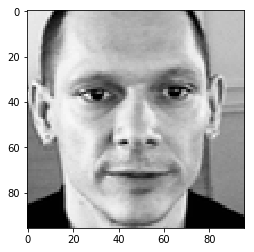

In [239]:
# testing data

image_no = 123
img = test_data['Image'][image_no]
img = img.split(' ')
img = np.asarray(img)
# reshaping the image to appropriate size
img = np.reshape(img, (96,96))
# changing the datatype as float
img_original = img.astype(np.float32)
# plotting the image
plt.imshow(img_original, cmap = 'gray')

In [240]:
img = img_original
img = np.reshape(img, (1,96,96,1))/255
print(img.shape)

(1, 96, 96, 1)


In [241]:
output = model.predict(img)
print(output[0]*96)

[65.07343  30.959892 59.019207 71.33507  37.057472 24.0108   56.32617
 76.60721  39.111057 18.220272 49.04563  63.513824 34.903664 49.60421
 49.54624  36.287918 37.231533 37.182465 36.358086 36.166317 37.97316
 29.765541 28.842636 30.522337 31.983032 56.37832  72.131134 73.73793
 69.823074 79.8139  ]


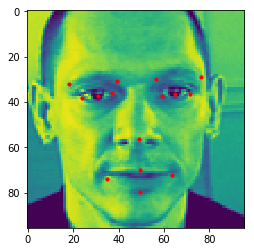

In [242]:
# remapping the points and plotting in the figure
i =0
x=[]
y = []
while i<15:
    x.append(output[0][i]*96)
    i = i +1
while i<30:
    y.append(output[0][i]*96)
    i = i +1
implot = plt.imshow(img_original)
plt.scatter(x=x,           
            y=y, c='red', s=10)
plt.show()

# KAGGLE SUBMISSION

In [281]:
# making of test tensor
X_test = []
i =0
while i<1709:
    image_no = i
    img = test_data['Image'][image_no]
    img = img.split(' ')
    img = np.asarray(img)
    img = img.astype(np.float32)/255
    # reshaping the image to appropriate size
    img = np.reshape(img, (96,96))
    X_test.append(img)
    i =i +1

In [282]:
X_test = np.asarray(X_test)
print(X_test.shape)

(1709, 96, 96)


In [283]:
# reshaping the tensor which is then fed to the model
X_test = np.reshape(X_test, (1709,96,96,1))
print(X_test.shape)

(1709, 96, 96, 1)


In [289]:
# predecting the value of land mark points
predicted = model.predict(X_test,verbose=1)

1709/1709 [==============================] - 7s 4ms/step


In [290]:
# showing the shape of the submission file
predicted.shape

(1709, 30)

In [291]:
# predicted values for the first test set data 
print(predicted[0])

[0.6968757  0.3056989  0.6304872  0.7644839  0.3687092  0.23285995
 0.6009549  0.8317989  0.39640886 0.16148362 0.5039365  0.6544513
 0.3488263  0.49915928 0.49914584 0.385303   0.38381878 0.38937458
 0.39616582 0.39581573 0.3860566  0.27887014 0.30588403 0.27373877
 0.29389    0.5438734  0.7918203  0.7936461  0.711796   0.88121605]


In [318]:
# loading the structure of the submission files
submission = pd.read_csv('idLookupTable.csv')

In [319]:
# submission files 
print(submission.head(5))

   RowId  ImageId              FeatureName  Location
0      1        1        left_eye_center_x       NaN
1      2        1        left_eye_center_y       NaN
2      3        1       right_eye_center_x       NaN
3      4        1       right_eye_center_y       NaN
4      5        1  left_eye_inner_corner_x       NaN


In [320]:
# location in the submission file is nan
print(submission['Location'][0])

nan


In [321]:
i = 0
count = 0
predicted_count = 0
while i<27125:
    if count %2 == 0:
        submission['Location'][i] =predicted[predicted_count][count]*96
    else:
        submission['Location'][i] = predicted[predicted_count][count]*96
    count = count + 1
    if count ==29:
        count =0
        predicted_count = predicted_count + 1
    if i%1000 ==0:
        print(i)
    i = i + 1

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000


In [322]:
# saving the submission file to be uploaded to kaggle
submission.to_csv('submit.csv', index = False)